# Affine Registration in 1D
Simple examples of affine and deformable registration in one dimension

In [1]:
import os
import numpy as np
from scipy import interpolate, ndimage
from PIL import Image
import torch
import torch.nn.functional as tfun
import matplotlib.pyplot as plt

Generate some sample 1D image data. We do this by taking a 2D image and sampling it along two rays. This givestorch.nn.functional that are similar in shape yet distinct

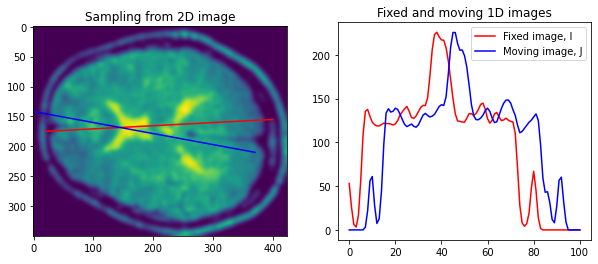

In [2]:
# Load a noisy image slice and smooth it
img_2d=np.asarray(Image.open('noisyMRIbrain.jpeg'))
img_2d_sm = ndimage.gaussian_filter(img_2d, 4.0)

# Define the number of samples in the fixed and moving images
n = 101

# Take two rays through the image to simulate 1D images
ray1_x, ray1_y = np.linspace(20,400,n), np.linspace(175,155,n);
ray2_x, ray2_y = np.linspace(-10,370,n), np.linspace(140,210,n);

# Interpolate the image along these two rays
I = interpolate.interpn((np.arange(img_2d_sm.shape[0]), np.arange(img_2d_sm.shape[1])), 
                        img_2d_sm, (ray1_x, ray1_y), bounds_error=False, fill_value=0)

J = interpolate.interpn((np.arange(img_2d_sm.shape[0]), np.arange(img_2d_sm.shape[1])), 
                        img_2d_sm, (ray2_x, ray2_y), bounds_error=False, fill_value=0)

# Plot what we did
fig,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(img_2d_sm)
ax[0].set_autoscale_on(False)
ax[0].plot(ray1_x, ray1_y, color='red')
ax[0].plot(ray2_x, ray2_y, color='blue')
ax[0].set_title('Sampling from 2D image')

ax[1].plot(I, color='red', label='Fixed image, I')
ax[1].plot(J, color='blue', label='Moving image, J')
ax[1].set_title('Fixed and moving 1D images')
ax[1].legend();

#I = interp2(im, sc1x, sc1y, 'linear', 0);
#J = interp2(im, sc2x, sc2y, 'linear', 0);

##  Translation and Scaling Transformations
Experiment with some translation transformations

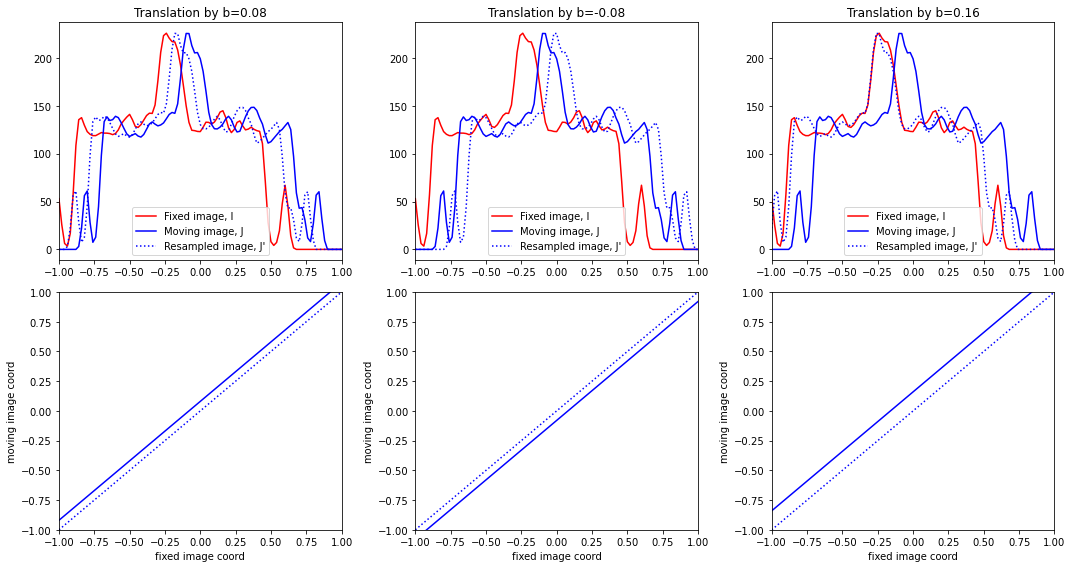

In [8]:
# Define the coordinate frame for the fixed and moving images to be between -1 and 1
t = np.linspace(-1, 1, n)

# These are the three translations we will consider
thetas = [0.08, -0.08, 0.16]

# For each translation, generate a plot
fig,ax = plt.subplots(2, len(thetas), figsize=(15,8))
for i,theta in enumerate(thetas):
    
    # Compute the transformed coordinate grid phi(t)
    phi_t = t + theta
    
    # Sample the moving image using coordinate grid
    J_prime = interpolate.interpn((t,), J, phi_t, bounds_error=False, fill_value=0)
    
    # Plot the images
    ax[0,i].set_xlim(-1, 1)
    ax[0,i].plot(t, I, 'r', label='Fixed image, I')
    ax[0,i].plot(t, J, 'b', label='Moving image, J')
    ax[0,i].plot(t, J_prime, 'b:', label='Resampled image, J\'')
    ax[0,i].set_title('Translation by b=%g' % (theta,))
    ax[0,i].legend()
    
    # Plot the transformations
    ax[1,i].set_xlim(-1, 1); ax[1,i].set_ylim(-1, 1);
    ax[1,i].plot(t, t, 'b:')
    ax[1,i].plot(t, phi_t,'b')
    ax[1,i].set_xlabel('fixed image coord')
    ax[1,i].set_ylabel('moving image coord')
    
fig.tight_layout();


And with some scaling transformations

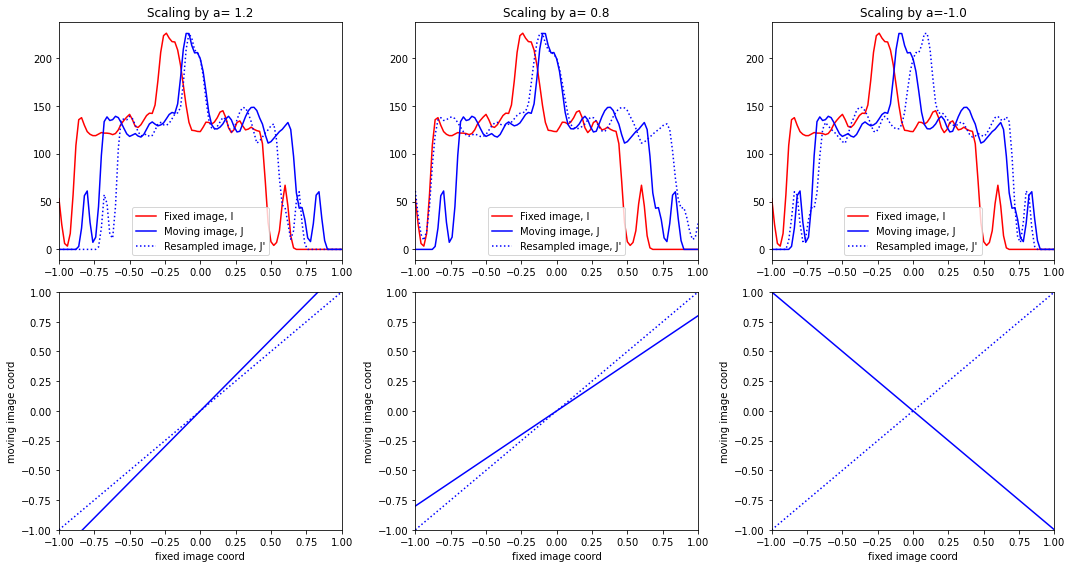

In [10]:
# These are the three translations we will consider
thetas = [1.2, 0.8, -1.0]

# For each translation, generate a plot
fig,ax = plt.subplots(2, len(thetas), figsize=(15,8))
for i,theta in enumerate(thetas):
    
    # Compute the transformed coordinate grid phi(t)
    phi_t = t * theta
    
    # Sample the moving image using coordinate grid
    J_prime = interpolate.interpn((t,), J, phi_t, bounds_error=False, fill_value=0)
    
    # Plot
    ax[0,i].set_xlim(-1,1)
    ax[0,i].plot(t, I, 'r', label='Fixed image, I')
    ax[0,i].plot(t, J, 'b', label='Moving image, J')
    ax[0,i].plot(t, J_prime, 'b:', label='Resampled image, J\'')
    ax[0,i].set_title('Scaling by a=%4.1f' % (theta,))
    ax[0,i].legend()
    
    # Plot the transformations
    ax[1,i].set_xlim(-1, 1); ax[1,i].set_ylim(-1, 1);
    ax[1,i].plot(t, t, 'b:')
    ax[1,i].plot(t, phi_t,'b')
    ax[1,i].set_xlabel('fixed image coord')
    ax[1,i].set_ylabel('moving image coord')
    
fig.tight_layout();

## Affine Transformations
How we consider some simple affine transformations, just for illustration sake. Also for each of the transformations, we will compute the mean squared error

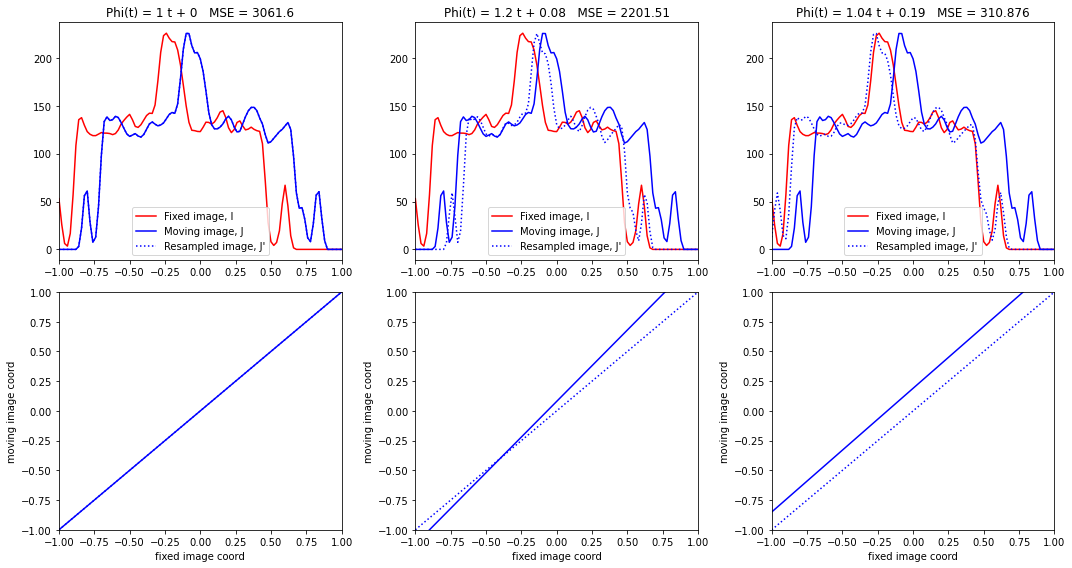

In [11]:
# These are the three translations we will consider
thetas = [(1.0, 0.0), (1.2, 0.08), (1.04, 0.19)]

# For each translation, generate a plot
fig,ax = plt.subplots(2, len(thetas), figsize=(15,8))
for i, (a,b) in enumerate(thetas):
    
    # Compute the transformed coordinate grid phi(t)
    phi_t = t * a + b
    
    # Sample the moving image using coordinate grid
    J_prime = interpolate.interpn((t,), J, phi_t, bounds_error=False, fill_value=0)
    
    # Compute MSE
    mse = np.mean((I - J_prime)**2)
    
    # Plot
    ax[0,i].set_xlim(-1,1)
    ax[0,i].plot(t, I, 'r', label='Fixed image, I')
    ax[0,i].plot(t, J, 'b', label='Moving image, J')
    ax[0,i].plot(t, J_prime, 'b:', label='Resampled image, J\'')
    ax[0,i].set_title('Phi(t) = %g t + %g   MSE = %g' % (a,b,mse))
    ax[0,i].legend()
        
    # Plot the transformations
    ax[1,i].set_xlim(-1, 1); ax[1,i].set_ylim(-1, 1);
    ax[1,i].plot(t, t, 'b:')
    ax[1,i].plot(t, phi_t,'b')
    ax[1,i].set_xlabel('fixed image coord')
    ax[1,i].set_ylabel('moving image coord')
    
fig.tight_layout();

## Non-linear parametric registration in 1D

Plot a non-linear transformation

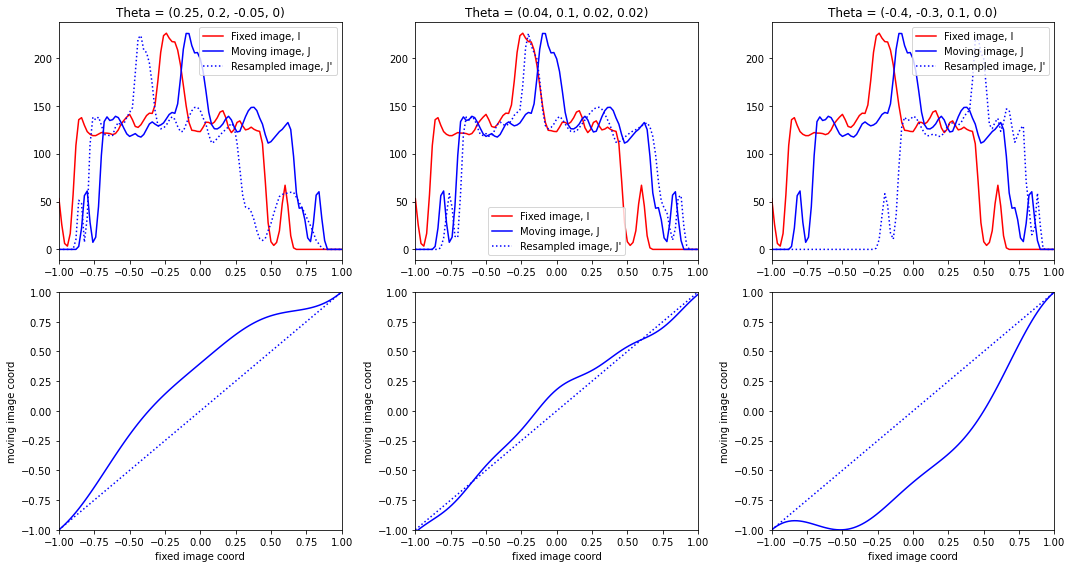

In [49]:
# These are the three translations we will consider
thetas = [(0.25, 0.2, -0.05, 0), (0.04, 0.1, 0.02, 0.02), (-0.4, -0.3, 0.1, 0.0)]

# For each translation, generate a plot
fig,ax = plt.subplots(2, len(thetas), figsize=(15,8))
for i, (a0,a1,a2,a3) in enumerate(thetas):
    
    # Compute the transformed coordinate grid phi(t)
    phi_t = t + a0 + a1 * np.cos(np.pi*t) + a2 * np.cos(2*np.pi*t) + a3 * np.cos(4*np.pi*t)
    
    # Sample the moving image using coordinate grid
    J_prime = interpolate.interpn((t,), J, phi_t, bounds_error=False, fill_value=0)
    
    # Compute MSE
    mse = np.mean((I - J_prime)**2)
    
    # Plot
    ax[0,i].set_xlim(-1,1)
    ax[0,i].plot(t, I, 'r', label='Fixed image, I')
    ax[0,i].plot(t, J, 'b', label='Moving image, J')
    ax[0,i].plot(t, J_prime, 'b:', label='Resampled image, J\'')
    ax[0,i].set_title('Theta = ' + str((a0,a1,a2,a3)))
    ax[0,i].legend()
        
    # Plot the transformations
    ax[1,i].set_xlim(-1, 1); ax[1,i].set_ylim(-1, 1);
    ax[1,i].plot(t, t, 'b:')
    ax[1,i].plot(t, phi_t,'b')
    ax[1,i].set_xlabel('fixed image coord')
    ax[1,i].set_ylabel('moving image coord')
    
fig.tight_layout();

## Affine image registration in 1D

We will switch to PyTorch for the optimization portion. First we convert the input to
tensors and define an objective function

In [11]:
# Convert our images to tensors of shape [1,1,1,N]
T_I = torch.tensor(I, dtype=torch.float32).reshape(1,1,1,n)
T_J = torch.tensor(J, dtype=torch.float32).reshape(1,1,1,n)

# Convert our coordinate grid to a tensor too
T_t = torch.tensor(t, dtype=torch.float32).reshape(1,1,n,1)

# Because we will be using the built-in 2D interpolation function, we have to
# add a second dimension to T_t, which will just be all zeros
T_t = torch.cat((T_t, torch.zeros_like(T_t)), -1)

# Create the initial parameters for the registration
T_theta = torch.tensor([1.0, 0.0], dtype=torch.float32, requires_grad=True)

# Define the objective function of affine registration
f_affine = lambda : torch.mean((T_I - tfun.grid_sample(T_J, T_t * T_theta[0] + T_theta[1], align_corners=True))**2)

# Evaluate the affine function for the identity transformation
print('MSE metric for identity transformation is %f' % (f_affine(),))

MSE metric for identity transformation is 3061.600342


Now perform the actual optimization (code similar to `optimization.ipynb`)

In [12]:
# Initialize the parameters to identity transformation
T_theta = torch.tensor([1.0, 0.0], dtype=torch.float32, requires_grad=True)

# Define an optimizer
optimizer = torch.optim.LBFGS((T_theta,), line_search_fn='strong_wolfe', max_iter=4)

# Keep track of optimization history
history = { 'theta': [], 'mse': []}

# Perform some number of iterations of optimizatoin
for i in range(10):
    
    # Zero out the gradients and compute the objective
    optimizer.zero_grad()
    obj = f_affine()
    
    # Compute gradients
    obj.backward()
    
    # Update our history
    history['theta'].append(T_theta.clone().detach().numpy())
    history['mse'].append(obj.item())
    
    # Print progress
    print('Iter %03d:    Phi(t) = %6.4f t + %6.4f    MSE = %6.4f' % (i,T_theta[0].item(),T_theta[1].item(),obj.item()))

    # Take a step in the inverse gradient direction
    optimizer.step(f_affine)

Iter 000:    Phi(t) = 1.0000 t + 0.0000    MSE = 3061.6003
Iter 001:    Phi(t) = 0.9762 t + 0.1781    MSE = 479.0064
Iter 002:    Phi(t) = 1.0292 t + 0.1965    MSE = 244.9422
Iter 003:    Phi(t) = 1.0303 t + 0.2016    MSE = 236.9691
Iter 004:    Phi(t) = 1.0253 t + 0.2003    MSE = 235.1874
Iter 005:    Phi(t) = 1.0270 t + 0.2008    MSE = 234.8432
Iter 006:    Phi(t) = 1.0268 t + 0.2006    MSE = 234.8263
Iter 007:    Phi(t) = 1.0268 t + 0.2006    MSE = 234.8262
Iter 008:    Phi(t) = 1.0268 t + 0.2006    MSE = 234.8262
Iter 009:    Phi(t) = 1.0268 t + 0.2006    MSE = 234.8262


Plot the transformations at different stages of the registration

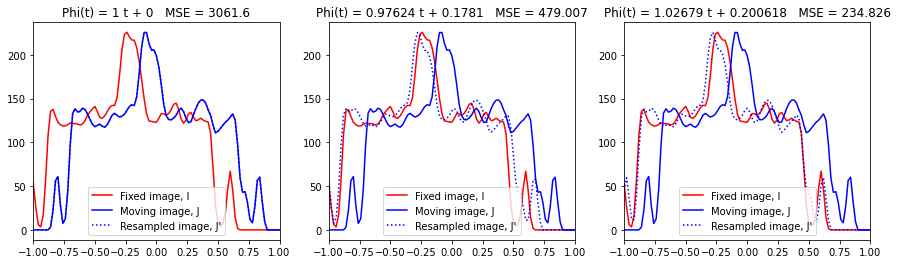

In [8]:
# These are the three translations we will consider
thetas = [history['theta'][0], history['theta'][1], history['theta'][-1]]

# For each translation, generate a plot
fig,ax = plt.subplots(1, len(thetas), figsize=(15,4))
for i, (a,b) in enumerate(thetas):
    
    # Compute the transformed coordinate grid phi(t)
    phi_t = t * a + b
    
    # Sample the moving image using coordinate grid
    J_prime = interpolate.interpn((t,), J, phi_t, bounds_error=False, fill_value=0)
    
    # Compute MSE
    mse = np.mean((I - J_prime)**2)
    
    # Plot
    ax[i].set_xlim(-1,1)
    ax[i].plot(t, I, 'r', label='Fixed image, I')
    ax[i].plot(t, J, 'b', label='Moving image, J')
    ax[i].plot(t, J_prime, 'b:', label='Resampled image, J\'')
    ax[i].set_title('Phi(t) = %g t + %g   MSE = %g' % (a,b,mse))
    ax[i].legend()